Welcome to our Final Project for Big Data!!! We're leaning about conspiracy theories, come along for the ride!

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import praw
import seaborn as sns
import re

%matplotlib inline

import random
import requests as rq
import sys
import io
from bs4 import BeautifulSoup
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop
from collections import Counter
from datetime import datetime
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
%load_ext tensorboard

In [4]:
f = open("conspiracydata1000.txt", "r")
content = f.read()
clean_text = re.sub(r"https?://\S+", "", content)
clean_text = re.sub(r"[^A-Za-z0-9\s]+", "", clean_text)


In [5]:
#we'd replace the rq.get with reading our own cleaned csv, presumably
#response = rq.get("http://www.dailyscript.com/scripts/pulp_fiction.html")
text = clean_text
print(text[:100]) # just prints out what we're seeing so we can make sure this is what we actually want

This is one of the things I dont understand There are a lot of people out there that use the term Lu


In [6]:
!pip install nltk

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download the punkt and stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


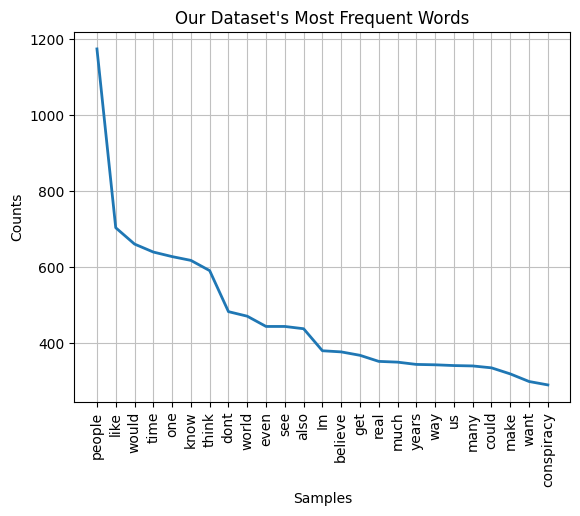

In [13]:
text_tokens = word_tokenize(text)
f = open("bow.txt", "a")
for a in text_tokens:
  f.write(a)
  f.write(", ")
f.flush()

filtered_text = [w for w in text_tokens if not w.lower() in stop_words and w.isalpha()]
fdist_text = FreqDist(filtered_text)

bow = fdist_text.plot(25, title = "Our Dataset's Most Frequent Words")


Exercise 1.5: Implementing TF-IDF Following slide 25 from week 7, create a function called TF that calculates the term frequency (TF) for each word in a document. It should take in a term (a word) and a document's bag of words and return the term frequency (a float) - remember to remove stopwords and non-alphabetical characters for the bag of words. Then create a function called IDF that takes in a term and some documents (their bag of words), and returns the inverse document frequency. Finally combine the two in a function called TF_IDF where the term frequency is weighted by the inverse document frequency.

Compute the TF_IDF of all words in the old and new testament and plot appertaining wordclouds! How did the WordClouds change? What happens to the TF_IDF if a term is present in all documents? Why is TF-IDF a more effective measure than simple term frequency when it comes to text analysis? How might you use TF-IDF in similarity analysis or search engine algorithms? Is there a faster way to get the TF_IDF when you only have 2 documents?

In [10]:
!python -m pip install wordcloud

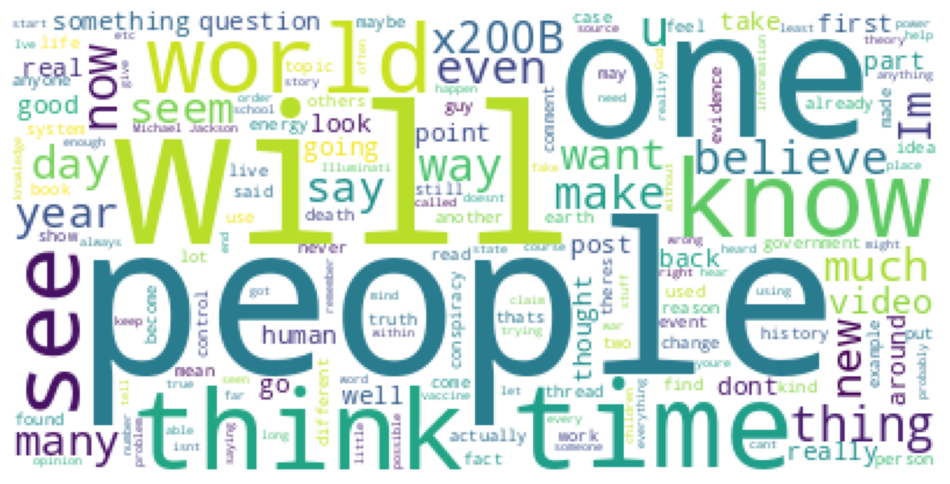

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

#Convert word list to a single string
clean_words_string = " ".join(text_tokens)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

# def TF(word, bag_of_words_document):
#     wc = bag_of_words_document.count(word)
#     total = len(bag_of_words_document)
#     return wc/total

# def IDF(word, bag_of_words_documents: list):
#     num_documents_with_word = sum(1 for doc in bag_of_words_documents if word in doc)
#     total_documents = len(bag_of_words_documents)
#     return math.log10(total_documents / (num_documents_with_word + 1))


# def TF_IDF(word, bag_of_words_document, bag_of_words_documents):
#     '''Function to calculate the term frequency-inverse document frequency of a word in a document'''
#     tf = TF(word, bag_of_words_document)
#     idf = IDF(word, bag_of_words_documents)
#     return tf * idf

# # for each word in the old testament, calculate the TF-IDF
# TF_IDF_text = []
# for w in text_tokens:
#     TF_IDF_text[w] = TF_IDF(w, text, text_tokens)

# TODO: Create the WordClouds for the old and new testament using the TF-IDF scores

In [8]:
f = open("cleanconspo.txt", "r")
content = f.read()
clean_text = re.sub(r"https?://\S+", "", content)
clean_text = re.sub(r"[^A-Za-z0-9\s]+", "", clean_text)
text2 = clean_text

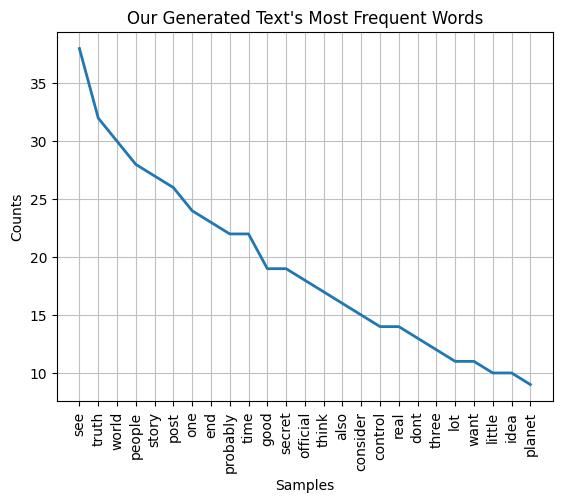

In [9]:
text_tokens2 = word_tokenize(text2)

filtered_text2 = [w for w in text_tokens2 if not w.lower() in stop_words and w.isalpha()]
fdist_text2 = FreqDist(filtered_text2)

bow = fdist_text2.plot(25, title = "Our Generated Text's Most Frequent Words")


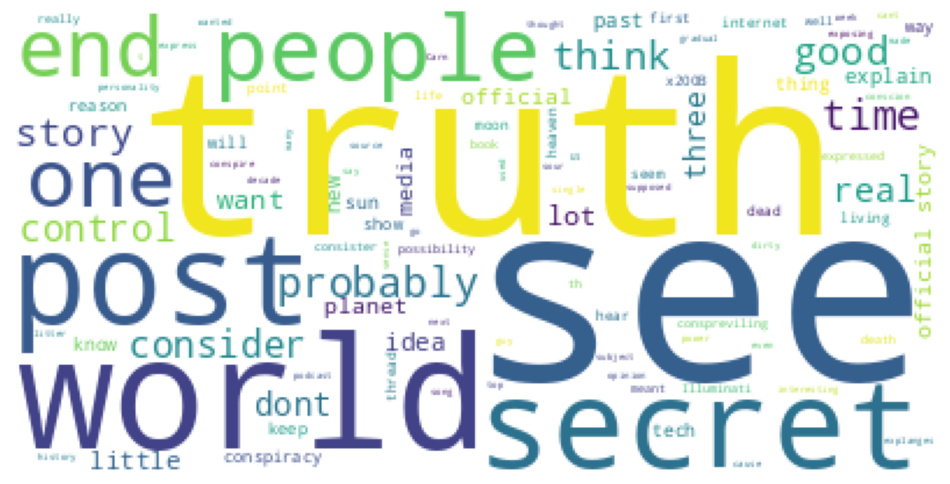

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

#Convert word list to a single string
clean_words_string = " ".join(text_tokens2)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()